# Analyzing the development of Data Science in Europe

In the scope of this Udacity project, I would like to focus on the development of Data Science jobs in European countries. Therefor, an annually Stack Overflow developer survey from 2011 until 2018 provides a wide range of data to tackle this topic and to find interesting insights within the trend of Data Science in Europe.

This Jupyter Notebook contains the code and some descriptions required within the process of analyzing the temporal growth and development of the Data Science community in Europe in the recent years. Do European countries go through the same development like American or Asian countries? I am also interested in the opinion of other Data Scientist according to their job and career satisfaction as well as their salary. What are influential and decisive features relating to these factors?

The structur of this file follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) process:

1. Data Understanding
First, we want to understand the provided data. Therefor, we import the Stack Overview developer survey data and take a look at the provided information within this database.

2. Business Understanding
Second, according to our defined goals from above, we want to formulate appropriate questions. These will help us to tackle the field in a structured manner.

3. Data Preparation
In the third step, we will prepare the data to obtain suitable variables for visualizing the information and answering the formulated questions.

4. Analysis and Modeling
The fourth step provides the implementation of analyzing methods as well as Machine Learning tools and algorithms to create visualizations and predictive models for our data. Here, we want to find information about statistical relationships and influential elements for our information.

5. Evaluation
In this step, we want to evaluate the developed model.

6. Deployment
The presentation and deployment of the obtained insights will be done within a blog post on Medium (see XXX)

## 1. Data Understanding
The data provided by the Stack Overview developer survey can be downloaded at [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey). Here, we can find the survey data from 2011 until 2018 downloadable in several zip-files. From 2011 to 2016, these files only contained the data in CSV-files (Comma-Separated Vectors) and, intermittently, a ReadMe-File defining the variables. Since 2017, a PDF-file containing the asked questions and possible responses as well as another CSV-file containing the schema of the data has been additionally provided.

Beforehand, I downloaded these files and saved them into a 'data' folder, including all data CSV-files, and a 'schema' folder with the schema files as well as the pdf files. The files are structured as follows:
- survey_data_201X.csv
- survey_schema_201X.csv

At first, have to import the required packages and the data for the analysis process.

In [1]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

The data is not consistent over all years of the survey. There is a different amount of questions, different variables and, hence, datasets with different shapes. To store everything in one variable, I decided to create a dictionary with the keys indicating the year and values holding Pandas DataFrames.

Since some error messages and warnings occurred, we have to set the encoding and low memory parameters of the read_csv() function of Pandas. Furthermore, the header is individually set for each year and has to be defined in the parameters.

In [2]:
# read Stack Overflow developer survey data from different years and store into a dictionary
data = {}
data['2011'] = pd.read_csv('./data/survey_data_2011.csv', encoding='latin_1', low_memory=False, header = [0,1])
data['2012'] = pd.read_csv('./data/survey_data_2012.csv', encoding='latin_1', low_memory=False, header = [0,1])
data['2013'] = pd.read_csv('./data/survey_data_2013.csv', encoding='latin_1', low_memory=False, header = [0,1])
data['2014'] = pd.read_csv('./data/survey_data_2014.csv', encoding='latin_1', low_memory=False, header = [0,1])
data['2015'] = pd.read_csv('./data/survey_data_2015.csv', encoding='latin_1', low_memory=False, skiprows=1)
data['2016'] = pd.read_csv('./data/survey_data_2016.csv', encoding='latin_1', low_memory=False)
data['2017'] = pd.read_csv('./data/survey_data_2017.csv', encoding='latin_1', low_memory=False)
data['2018'] = pd.read_csv('./data/survey_data_2018.csv', encoding='latin_1', low_memory=False)

In [3]:
# import schema for 2017 and 2018
schema = {}
schema['2017'] = pd.read_csv('./schema/survey_schema_2017.csv')
schema['2018'] = pd.read_csv('./schema/survey_schema_2018.csv')

Let's take a look at the structure and shape of each dataframe.

In [4]:
# print out the amount of rows and columns and the type of columns to explore the datasets
print('year \t rows   \t columns \t type of columns')
print(90*'-')
for i in data.keys():
    print('{} \t {}   \t {} \t\t {}'.format(i,data[i].shape[0],data[i].shape[1],type(data[i].columns)))

year 	 rows   	 columns 	 type of columns
------------------------------------------------------------------------------------------
2011 	 2813   	 65 		 <class 'pandas.core.indexes.multi.MultiIndex'>
2012 	 6243   	 75 		 <class 'pandas.core.indexes.multi.MultiIndex'>
2013 	 9742   	 128 		 <class 'pandas.core.indexes.multi.MultiIndex'>
2014 	 7643   	 120 		 <class 'pandas.core.indexes.multi.MultiIndex'>
2015 	 26086   	 222 		 <class 'pandas.core.indexes.base.Index'>
2016 	 56030   	 66 		 <class 'pandas.core.indexes.base.Index'>
2017 	 51392   	 154 		 <class 'pandas.core.indexes.base.Index'>
2018 	 98855   	 129 		 <class 'pandas.core.indexes.base.Index'>


Obviously, the survey was performed each year using a different amount of questions. The number of participants has also increased from 2,814 in 2011 to nearly 100,000 in 2018.
To compare the survey in 2011 and 2018, we take a look at the columns and a data sample.

In [5]:
# data sample of 2011
data['2011'].head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,What types of purchases are you involved in?,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,What type of project are you developing?,Which languages are you proficient in?,Unnamed: 31_level_0,Unnamed: 32_level_0,Unnamed: 33_level_0,Unnamed: 34_level_0,Unnamed: 35_level_0,Unnamed: 36_level_0,Unnamed: 37_level_0,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Unnamed: 41_level_0,Unnamed: 42_level_0,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47_level_0,Unnamed: 48_level_0,Unnamed: 49_level_0,Unnamed: 50_level_0,Unnamed: 51_level_0,Unnamed: 52_level_0,Unnamed: 53_level_0,Unnamed: 54_level_0,Unnamed: 55_level_0,Unnamed: 56_level_0,Unnamed: 57_level_0,Unnamed: 58_level_0,Unnamed: 59_level_0,Unnamed: 60_level_0,Unnamed: 61_level_0,Unnamed: 62_level_0,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Response,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,None,other (please specify),Response,Response,Response,iPhone,Android,Blackberry,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,Blu-Ray,HDTV,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
0,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
1,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
2,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,Na

In [6]:
# data sample of 2018
data['2018'].head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"Iâm not actively looking, but I am open to n...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,U

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(schema['2018'])

                          Column                                       QuestionText
0                     Respondent  Randomized respondent ID number (not in order ...
1                          Hobby                            Do you code as a hobby?
2                     OpenSource         Do you contribute to open source projects?
3                        Country          In which country do you currently reside?
4                        Student  Are you currently enrolled in a formal, degree...
5                     Employment  Which of the following best describes your cur...
6                FormalEducation  Which of the following best describes the high...
7                 UndergradMajor  You previously indicated that you went to a co...
8                    CompanySize  Approximately how many people are employed by ...
9                        DevType  Which of the following describe you? Please se...
10                   YearsCoding  Including any education, for how many year

In [8]:
# to get a better data understanding, a complete description of the variables is needed
# Therefor, we define the get_description()-function from the Udacity "How To Break Into the Field"-lesson
def get_description(column_name, schema_year = '2018', schema = schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    schema = schema[schema_year]
    if schema_year == '2018':
        desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    elif schema_year == '2017':
        desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    
    return desc

get_description('UndergradMajor', '2018')

"You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')"

## 2. Business Understanding
In this project, I am interested in the trend of Data Science jobs in European countries. With the support of the data provided by the Stack Overflow survey, I would like to answer these questions:

1. Analyzing Trends and Developments in Data Science jobs
    - What is the chronological trend of Data Science jobs in Europe in comparison to American, Asian or African countries?
    - How are data scientists actually distributed over continents and countries?


2. What are common job requirements and qualifications for data science jobs in Europe?
    - What is the common level of education of employees in the field of data science?
    - How old are these data scientists?
    - Are there more male or female data scientists in Europe?
    - How many years of coding experience do data scientists in Europe have?
    - In what company sizes do data scientists typically participate in Europe?
    - How are data scientists employed within companies?
    - What tools are commonly used by data scientists in Europe?


3. Which features mostly influence the job satisfaction according to data scientists in Europe?


4. Which features mostly influence the salary of data scientists in Europe?

## 3. Data Preparation
According to the table in section one (Data Understanding) and the shown data samples, the survey datasets have different amount of columns, different types of column headers and names as well as different variables. E.g., we cannot compare the annual surveys on every variable without data preparation. Furthermore, the datasets contain lots of missing values, that will result in errors within the modeling process. Thus, this section will be structured into several individual problems, that have to be handled to obtain a usable dataset.

### 3.1 Select required variables and gather data
In the first data preparation step, we want to select the information, we need to answer the questions stated in section two (Business Understanding). Here, we define the required information for each set of question and name the corresponding variable from the datasets in brackets.

- Required for question 1:
    - to obtain a chronological development, data from 2011 to 2018 are required
    - Occupation (named differentially in the datasets)
    - Region (named differentially in the datasets or has to be created)
    - Country (named differentially in the datasets)
    

- Required for question 2:
    - to obtain an actual impression, we only need survey data from 2018 and from European countries
    - Level of Education (FormalEducation)
    - Age (Age)
    - Gender (Gender)
    - Programming Experience (YearsCoding)
    - Programming language required (LanguageWorkedWith)
    - Size of Company (CompanySize)
    - Status of Employment (Employment and Student)
    - Main Field of Studies (UndergradMajor)
    - Occupation (DevType)
    - Country (Country)
    - Non-degree Education (EducationTypes)
    - Satisfaction (JobSatisfaction, CareerSatisfaction)
    - Salary (ConvertedSalary*)


- Required for question 3 and 4:
    - to obtain an actual impression, we only need survey data from 2018 and from European countries
    - input features:
        - variables of question 2
    
    - response variables:
        - Salary (ConvertedSalary*)
        - Satisfaction (JobSatisfaction, CareerSatisfaction)
    

For question 3 and 4, we want to model the salary as well as job and career satisfaction of data scientists in European countries depending on the input features, we explored in question. Therefor, we ignore variables regarding for example the usage of Stack Overflow. We would like to focus on features concerning the education, qualification and employment status as well as main characteristics of each data scientist (gender, age etc.).


\* We use the ConvertedSalary column, which gives us the salary converted in US-\$ and, hence, a unified metric of salary.

#### 3.1.1 Adjust and clean geographical information

We want to focus inter alia on the geographical distribution of data science and its change over time. Furthermore, we want to focus on European data scientists, thus, we have to filter the data on the country or region of these survey participants. Therefor, we require consitent regional data.

In this step, we unify the country names and assign their specific and superordinate region using a dictionary to find geographical characteristics. To do so, we also have to identify unspecific survey responses regarding the geographical background of the person. Thus, we will remove all observations containing "other" or "i prefer not to say".

In [9]:
# create a region dictionary
region_dict = {}
for country in data['2016'].country.unique():
    regions = data['2016'][data['2016'].country==country].so_region.unique()
    if regions.size>0:
        region_dict[country] = regions[0]

region_dict['Congo {Democratic Rep}'] = 'Africa'
region_dict['Congo, Republic of the...'] = 'Africa'
region_dict['Libya'] = 'Africa'
region_dict['Eritrea'] = 'Africa'
region_dict['Mali'] = 'Africa'
region_dict['Swaziland'] = 'Africa'
region_dict['Gambia'] = 'Africa'
region_dict['Senegal'] = 'Africa'
region_dict['Cape Verde'] = 'Africa'
region_dict['South Sudan'] = 'Africa'
region_dict['Burkina Faso'] = 'Africa'
region_dict['Reunion (French)'] = 'Africa'
region_dict['Comoros'] = 'Africa'
region_dict['Central African Republic'] = 'Africa'
region_dict['Liberia'] = 'Africa'
region_dict['Guinea-Bissau'] = 'Africa'
region_dict['Lesotho'] = 'Africa'
region_dict['South America'] = 'South America'
region_dict['S. Georgia & S. Sandwich Isls.'] = 'South America'
region_dict['French Guyana'] = 'South America'
region_dict['Falkland Islands'] = 'South America'
region_dict['Azerbaidjan'] = 'Eastern Europe'
region_dict['Central America'] = 'Central America'
region_dict['North America'] = 'North America'
region_dict['Africa'] = 'Africa'
region_dict['Solomon Islands'] = 'Oceania'
region_dict['American Samoa'] = 'Oceania'
region_dict['Virgin Islands (USA)'] = 'Oceania'
region_dict['Virgin Islands (British)'] = 'Oceania'
region_dict['Middle East'] = 'Middle East'
region_dict['Brunei'] = 'Southeast Asia'
region_dict['Christmas Island'] = 'Southeast Asia'
region_dict['Timor-Leste'] = 'Southeast Asia'
region_dict['Turkmenistan'] = 'Central Asia'
region_dict['Tadjikistan'] = 'Central Asia'
region_dict['Netherlands Antilles'] = 'Caribbean'
region_dict['Anguilla'] = 'Caribbean'
region_dict['Saint Lucia'] = 'Caribbean'
region_dict['Aruba'] = 'Caribbean'
region_dict['Antigua and Barbuda'] = 'Caribbean'
region_dict['Montserrat'] = 'Caribbean'
region_dict['Martinique (French)'] = 'Caribbean'
region_dict['Saint Vincent & Grenadines'] = 'Caribbean'
region_dict['Cayman Islands'] = 'Caribbean'
region_dict['U.S. Minor Outlying Islands'] = 'Oceania'
region_dict['New Caledonia (French)'] = 'Oceania'
region_dict['Gibraltar'] = 'Western Europe'
region_dict['Micronesia'] = 'Oceania'
region_dict['Polynesia (French)'] = 'Oceania'
region_dict['Pitcairn Island'] = 'Oceania'
region_dict['Guam'] = 'Oceania'
region_dict['Northern Mariana Islands'] = 'Oceania'
region_dict['Cook Islands'] = 'Oceania'
region_dict['Marshall Islands'] = 'Oceania'
region_dict['Nauru'] = 'Oceania'
region_dict['Australasia'] = 'Oceania'

In [10]:
def clean_countries(df, regions=region_dict):
    '''
    unify the country variable and create a new columns with corresponding regions
    
    INPUT - df - Pandas Dataframe with column countries which has to be adjusted
            regions - dictionary containing country - region assignments
            
    OUTPUT - df - adjusted Dataframe with additional 'region' and 'superordinate_region' columns
    '''
    
    # clean double country names
    US_states = ['California', 'New Jersey', 'Nevada', 'Wisconsin','Pennsylvania', 'New York', 'South Carolina', 'Michigan',
                 'Texas', 'Washington', 'Minnesota', 'North Carolina', 'Ohio', 'Illinois', 'Florida', 'Arizona', 'Tennessee',
                 'Colorado', 'Alabama', 'Oregon', 'Kentucky', 'Massachusetts', 'Alaska', 'Idaho', 'South Dakota', 'Missouri',
                 'Maryland', 'New Hampshire', 'Virginia', 'Maine', 'Utah', 'Washington DC', 'Louisiana', 'Indiana', 'Nebraska',
                 'Vermont', 'Iowa', 'Oklahoma', 'Montana', 'Connecticut', 'Kansas', 'Wyoming', 'Arkansas', 'West Virginia',
                 'Delaware', 'Rhode Island', 'New Mexico', 'Mississippi', 'North Dakota', 'United States of America']
    
    Congo = ['Congo {Democratic Rep}', 'Democratic Republic of the Congo', 'Zaire']
    S_Korea = ['South Korea', 'Korea South', 'Republic of Korea']
    N_Korea = ['North Korea', 'Korea North', "Democratic People's Republic of Korea"]
    China = ['China', 'Hong Kong', 'Hong Kong (S.A.R.)', 'Macau']
    
    df['country'] = df['country'].apply(lambda x: 'United States' if x in US_states else x)
    df['country'] = df['country'].apply(lambda x: 'Korea South' if x in S_Korea else x)
    df['country'] = df['country'].apply(lambda x: 'Korea North' if x in N_Korea else x)
    df['country'] = df['country'].apply(lambda x: 'China' if x in China else x)
    df['country'] = df['country'].apply(lambda x: 'Macedonia' if 'macedonia' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Myanmar, {Burma}' if 'myanmar' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Congo {Democratic Rep}' if x in Congo else x)
    df['country'] = df['country'].apply(lambda x: 'Vatican City' if 'vatican' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Bosnia Herzegovina' if 'bosnia' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Venezuela' if 'venezuela' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Iran' if 'iran' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Slovakia' if 'slovak' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Tanzania' if 'tanzania' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Moldova' if 'mold' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Brunei' if 'brunei' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Ivory Coast' if 'ivo' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Vietnam' if 'viet' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Syria' if 'syr' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Ireland {Republic}' if 'ireland' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Russian Federation' if 'russia' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Trinidad & Tobago' if 'trinidad' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Finland' if 'Aland' in str(x) else x)
    df['country'] = df['country'].apply(lambda x: 'Libya' if 'libya' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: 'Micronesia' if 'micronesia' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: np.nan if 'other' in str(x).lower() else x)
    df['country'] = df['country'].apply(lambda x: np.nan if 'i prefer not to say' in str(x).lower() else x)
    
    # create region column based on dictionary
    df['region'] = df['country'].apply(lambda x: regions[x] if x in list(regions.keys()) else np.nan)
    
    Europe = ['Western Europe', 'Eastern Europe']
    America = ['North America', 'Central America', 'South America', 'Caribbean']
    Asia = ['South Asia', 'Middle East', 'Southeast Asia', 'East Asia', 'Central Asia']

    # create subordinate_region columns based on region
    df['superordinate_region'] = df['region'].apply(lambda x: 'Europe' if x in Europe else
                                                           ('America' if x in America else
                                                           ('Asia' if x in Asia else x)))
    # drop all nan values
    df.dropna(axis=0,subset=['country','region','superordinate_region'], inplace = True)
    
    return df

#### 3.1.2 Identify Data Scientists

In various columns, information about the actual job are contained. We would like to find out, how many of the survey participants are working within the field of data science.

We will add another column showing whether the person is a data scientist (1) or not (0).

In [11]:
def add_data_science_job(df):
    '''
    find data science jobs within the occupation column of the dataframe
    
    INPUT - df - Pandas Dataframe with column occupation
            
    OUTPUT - df - Pandas Dataframe with new 'boolean' Data Science column 
                  (1 = job linked with Data Science, 0 = no link to Data Science)
    '''
    
    # create new data_science column with 1 and 0 mapping
    # inspired by: https://github.com/gauravansal/Analysis-of-Data-Science-community-growth-from-2011-2018
    df['data_science'] = df['occupation'].str.contains('.*ata|scientist|machine|learning|algorithm|business|analyst')
    df['data_science'] = df['data_science'].apply(lambda x: 1 if x == True else (0 if x == False else x))
    
    return df

#### 3.1.3 Gathering and Selecting Data for Question Sets 1 and 2

After defining functions for cleaning and adding geographical and regional information as well as identifying data scientists within the group of survey participants, we apply them to define the datasets required for tackling the questions.

We distinguish between chronological data, which filters from all datasets from 2011 to 2018 and the actual data from 2018. Within the latter we will focus on more different features taken from the 2018 Stack Overflow survey.

In [12]:
# create a dataset with required information for question 1
def create_data_question1(data=data):
    '''
    Create a DataFrame containing the occupation and regional data (country) for each year (2011-2018)
   
    INPUT - data - dictionary containg the survey data for each year
    
    OUTPUT - q1_df - Pandas Dataframe containg required columns
    '''
    q1_dict = {}
    
    col_names=['country', 'occupation']
    
    # import data from year 2011
    select_cols_ind = [0, 6]
    q1_dict['2011'] = data['2011'].iloc[:,select_cols_ind]
    q1_dict['2011'].columns = col_names
    q1_dict['2011'].loc[:,'year'] = 2011
    
    # import data from year 2012
    select_cols_ind = [0, 6]
    q1_dict['2012'] = data['2012'].iloc[:,select_cols_ind]
    q1_dict['2012'].columns = col_names
    q1_dict['2012'].loc[:,'year'] = 2012
    
    # import data from year 2013
    select_cols_ind = [0, 6]
    q1_dict['2013'] = data['2013'].iloc[:,select_cols_ind]
    q1_dict['2013'].columns = col_names
    q1_dict['2013'].loc[:,'year'] = 2013
    
    # import data from year 2014
    select_cols_ind = [0, 6]
    q1_dict['2014'] = data['2014'].iloc[:,select_cols_ind]
    q1_dict['2014'].columns = col_names
    q1_dict['2014'].loc[:,'year'] = 2014
    
    # import data from year 2015
    select_cols_ind = [0, 5]
    q1_dict['2015'] = data['2015'].iloc[:,select_cols_ind]
    q1_dict['2015'].columns = col_names
    q1_dict['2015'].loc[:,'year'] = 2015
    
    # import data from year 2016
    select_cols_ind = [2, 10]
    q1_dict['2016'] = data['2016'].iloc[:,select_cols_ind]
    q1_dict['2016'].columns = col_names
    q1_dict['2016'].loc[:,'year'] = 2016
    
    # import data from year 2017
    # merge the developer type and non-developer type into a new occupation column
    select_cols_ind = [3, 154]
    data['2017'].loc[:,'occuption'] = data['2017'].iloc[:,14:18].apply(lambda x:
                                                                       ";".join([i for i in list(x) if not pd.isna(i)]),axis=1)
    q1_dict['2017'] = data['2017'].iloc[:,select_cols_ind]
    q1_dict['2017'].columns = col_names
    q1_dict['2017'].loc[:,'year'] = 2017
    
    # import data from year 2018
    select_cols_ind = [3, 9]
    q1_dict['2018'] = data['2018'].iloc[:,select_cols_ind]
    q1_dict['2018'].columns = col_names
    q1_dict['2018'].loc[:,'year'] = 2018
    
    # combine DataFrames from dictionary
    q1_df = q1_dict['2011']
    for year in range(2012,2019):
        q1_df = q1_df.append(q1_dict[str(year)],ignore_index=True, sort=False)
        
    # clean and adjust countries
    q1_df = clean_countries(q1_df)
    
    # add data science column
    q1_df = add_data_science_job(q1_df)
    
    # rearrange columns
    q1_df = q1_df[['year','country','region', 'superordinate_region','occupation','data_science']]
    
    return q1_df        

In [13]:
q1_df = create_data_question1(data)
print('Shape of dataset for question 1: {}'.format(q1_df.shape))
print('Number of missing values: {}'.format(q1_df.isna().sum().sum()))
print('Data Science jobs: {} \nOther jobs: {}'.format(q1_df.data_science.value_counts()[1],q1_df.data_science.value_counts()[0]))

Shape of dataset for question 1: (252811, 6)
Number of missing values: 43748
Data Science jobs: 34407 
Other jobs: 196530


In [14]:
q1_df.head()

,year,country,region,superordinate_region,occupation,data_science
0,2011,Africa,Africa,Africa,Web Application Developer,0.0
2,2011,India,South Asia,Asia,Server Programmer,0.0
3,2011,Germany,Western Europe,Europe,Student,0.0
5,2011,Australia,Oceania,Oceania,Web Application Developer,0.0
6,2011,United States,North America,America,"Executive (VP of Eng, CTO, CIO, etc.)",0.0


In [15]:
# create a dataset with required information for question 2
def create_data_question2(data=data):
    '''
    Create dataframe required for question 2 with:
        FormalEducation, Age, Gender, YearsCoding, YearsCodingProf, LanguageWorkedWith, DatabaseWorkedWith, PlatformWorkedWith,
        CompanySize, Employment, Student, UndergradMajor, DevType, Country, EducationTypes, JobSatisfaction, 
        CareerSatisfaction, ConvertedSalary
    Filter for European countries
    Create new columns region and data_science
   
    INPUT - data - dictionary containg the survey data for each year
    
    OUTPUT - df - Pandas Dataframe containg required columns
    '''
    # import data from year 2018
    data = data['2018']
    
    col_names=['country', 'occupation','formal_education', 'age', 'gender', 'years_coding', 'language',
               'company_size','employment','student','undergrad_major', 'education_type', 
               'job_satisfaction', 'career_satisfaction', 'salary']
    
    select_cols_ind = [3, 9, 6, 124, 120, 10, 65, 8, 5, 4, 7, 58, 12, 13, 54]
    df = data.iloc[:,select_cols_ind]
    df.columns = col_names
        
    # clean and adjust countries
    df = clean_countries(df)
    
    # add data science column
    df = add_data_science_job(df)
    
    return df        

In [16]:
q2_df = create_data_question2(data)
print('Shape of dataset for question 2: {}'.format(q2_df.shape))
print('Data Science jobs: {} \nOther jobs: {}'.format(q2_df.data_science.value_counts()[1],q2_df.data_science.value_counts()[0]))
print('Number of missing values: {}'.format(q2_df.isna().sum().sum()))

Shape of dataset for question 2: (98357, 18)
Data Science jobs: 21866 
Other jobs: 70163
Number of missing values: 293913


In [17]:
q2_df.head()

,country,occupation,formal_education,age,gender,years_coding,language,company_size,employment,student,undergrad_major,education_type,job_satisfaction,career_satisfaction,salary,region,superordinate_region,data_science
0,Kenya,Full-stack developer,"Bachelorâs degree (BA, BS, B.Eng., etc.)",25 - 34 years old,Male,3-5 years,JavaScript;Python;HTML;CSS,20 to 99 employees,Employed part-time,No,Mathematics or statistics,"Taught yourself a new language, framework, or ...",Extremely satisfied,Extremely satisfied,NaN,Africa,Africa,0.0
1,United Kingdom,Database administrator;DevOps specialist;Full-...,"Bachelorâs degree (BA, BS, B.Eng., etc.)",35 - 44 years old,Male,30 or more years,JavaScript;Python;Bash/Shell,"10,000 or more employees",Employed full-time,No,"A natural science (ex. biology, chemistry, phy...","Taught yourself a new language, framework, or ...",Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Western Europe,Europe,1.0
2,United States,Engineering manager;Full-stack developer,Associate degree,NaN,NaN,24-26 years,NaN,20 to 99 employees,Employed full-time,No,"Computer science, computer engineering, or sof...",NaN,Moderately satisfied,Moderately satisfied,NaN,North America,America,0.0
3,United States,Full-stack developer,"Bachelorâs degree (BA, BS, B.Eng., etc.)",35 - 44 years old,Male,18-20 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,100 to 499 employees,Employed full-time,No,"Computer science, computer engineering, or sof...",Completed an industry certification program (e...,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,North America,America,0.0
4,South Africa,Data or business analyst;Desktop or enterprise...,Some college/university study without earning ...,18 - 24 years old,Male,6-8 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,"10,000 or more employees",Employed full-time,"Yes, part-time","Computer science, computer engineering, or sof...",Taken a part-time in-person course in programm...,Slightly satisfied,Moderately satisfied,21426.0,Africa,Africa,1.0


### 3.2 Handling missing data

Partially, we already deleted some missing values within the geographical columns.
In this section, we want to identify other missing values and handle them by removing or imputing the data.

#### 3.2.1 Identifying missing values

In [18]:
# check for missing data in dataset for question 1
for col in q1_df. columns:
    print('{:>12}:{:>12} missing values = {:.2f}%'.format(col, q1_df[col].isnull().sum(),q1_df[col].isnull().sum()/q1_df.shape[0]*100))

        year:           0 missing values = 0.00%
     country:           0 missing values = 0.00%
      region:           0 missing values = 0.00%
superordinate_region:           0 missing values = 0.00%
  occupation:       21874 missing values = 8.65%
data_science:       21874 missing values = 8.65%


Obviously, the columns data_science and occupation have the same number of missing values, because we derived the data_science column from the other one.
As mentioned, we already tackled missing values in the country and region data. The year column is also complete.

The rate of missing values (6.57%) is ok to remove all missing values. Thus, we can keep over 93% of the observations.

In [19]:
# check for missing data in dataset for question 2
for col in q2_df. columns:
    print('{:>20}:{:>12} missing values = {:>2.2f}%'.format(col, q2_df[col].isnull().sum(), q2_df[col].isnull().sum()/q2_df.shape[0]*100))

             country:           0 missing values = 0.00%
          occupation:        6328 missing values = 6.43%
    formal_education:        3727 missing values = 3.79%
                 age:       33840 missing values = 34.41%
              gender:       33941 missing values = 34.51%
        years_coding:        4594 missing values = 4.67%
            language:       20086 missing values = 20.42%
        company_size:       26871 missing values = 27.32%
          employment:        3106 missing values = 3.16%
             student:        3529 missing values = 3.59%
     undergrad_major:       19378 missing values = 19.70%
      education_type:       30448 missing values = 30.96%
    job_satisfaction:       29131 missing values = 29.62%
 career_satisfaction:       21909 missing values = 22.27%
              salary:       50697 missing values = 51.54%
              region:           0 missing values = 0.00%
superordinate_region:           0 missing values = 0.00%
        data_science: 

In [20]:
# check for rows with only NaN values
q2_df.isnull().all(axis=1).value_counts()

False    98357
dtype: int64

In the second dataset, we have a lot of more missing values. Especially, the salary column has over 50% of missing data, which is a problem, because we want to use this variable for modeling in section 4. Additionally, age and gender have over one third of missing values.

We have no rows that only consist of NaN values.

#### 3.2.2 Removing / Imputing missing values

Dataset q1_df only showed some missing data, thus it is acceptable to remove these rows.

In [21]:
q1_df.dropna(axis=0, inplace=True)
print("Missing values in dataset: {}".format(q1_df.isnull().sum().sum()))

Missing values in dataset: 0


Dataset q2_df is a bit more complicated. Within the focus of the question
At first, we will focus on the variable with the most missing data - "Salary". Here, we will impute the missing values by applying the median of the corresponding country. Because the mean can be shifted to higher values due to very high salaries, we use the median to get a better metric for the salary of data scientists or other developers over the world. 

In [22]:
# impute missing salary data by filling in the median of the corresponding country
q2_df["salary"].fillna(q2_df.groupby("country")["salary"].transform("median"), inplace=True) 
for col in q2_df. columns:
    print('{:>20}:{:>12} missing values = {:>2.2f}%'.format(col, q2_df[col].isnull().sum(), q2_df[col].isnull().sum()/q2_df.shape[0]*100))

             country:           0 missing values = 0.00%
          occupation:        6328 missing values = 6.43%
    formal_education:        3727 missing values = 3.79%
                 age:       33840 missing values = 34.41%
              gender:       33941 missing values = 34.51%
        years_coding:        4594 missing values = 4.67%
            language:       20086 missing values = 20.42%
        company_size:       26871 missing values = 27.32%
          employment:        3106 missing values = 3.16%
             student:        3529 missing values = 3.59%
     undergrad_major:       19378 missing values = 19.70%
      education_type:       30448 missing values = 30.96%
    job_satisfaction:       29131 missing values = 29.62%
 career_satisfaction:       21909 missing values = 22.27%
              salary:          73 missing values = 0.07%
              region:           0 missing values = 0.00%
superordinate_region:           0 missing values = 0.00%
        data_science:  

We managed to reduce the missing values in the salary column from over 50,000 to only 73. We will remove the remaining missing values.

The data_science variable also contains NaN missing values (around 6.43%). Most of the questions focus on the features of data scientists. Thus, we clearly have to divide the dataset into data scientists and no data scientists and remove all missing values in this column. 

As shown before in dataset q1_df, we already removed the missing regional data.

In [23]:
# remove missing values in salary and data_science
q2_df.dropna(axis=0, subset=["salary","data_science"], inplace=True) 
for col in q2_df. columns:
    print('{:>20}:{:>12} missing values = {:>2.2f}%'.format(col, q2_df[col].isnull().sum(), q2_df[col].isnull().sum()/q2_df.shape[0]*100))

             country:           0 missing values = 0.00%
          occupation:           0 missing values = 0.00%
    formal_education:        1928 missing values = 2.10%
                 age:       28623 missing values = 31.12%
              gender:       28722 missing values = 31.23%
        years_coding:          75 missing values = 0.08%
            language:       15207 missing values = 16.53%
        company_size:       21735 missing values = 23.63%
          employment:        1302 missing values = 1.42%
             student:        1706 missing values = 1.85%
     undergrad_major:       14474 missing values = 15.74%
      education_type:       25343 missing values = 27.55%
    job_satisfaction:       23204 missing values = 25.23%
 career_satisfaction:       16063 missing values = 17.46%
              salary:           0 missing values = 0.00%
              region:           0 missing values = 0.00%
superordinate_region:           0 missing values = 0.00%
        data_science:  

### 3.3 Handling categorical data

To handle categorical data, we take a look at the dtypes of the datasets.

In [24]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230937 entries, 0 to 258800
Data columns (total 6 columns):
year                    230937 non-null int64
country                 230937 non-null object
region                  230937 non-null object
superordinate_region    230937 non-null object
occupation              230937 non-null object
data_science            230937 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.3+ MB


We already handled the data within the categorical variables. Now, there are no missing or duplicate (with different names) values and the dataset is usable as it is. To calculate the proportion of data scientists within countries and regions over time, we will focus on all values of the column data_science.

Let's look at the second dataset and discuss each categorical variable and it's number of missing values and how to handle them.

In [25]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91975 entries, 0 to 98851
Data columns (total 18 columns):
country                 91975 non-null object
occupation              91975 non-null object
formal_education        90047 non-null object
age                     63352 non-null object
gender                  63253 non-null object
years_coding            91900 non-null object
language                76768 non-null object
company_size            70240 non-null object
employment              90673 non-null object
student                 90269 non-null object
undergrad_major         77501 non-null object
education_type          66632 non-null object
job_satisfaction        68771 non-null object
career_satisfaction     75912 non-null object
salary                  91975 non-null float64
region                  91975 non-null object
superordinate_region    91975 non-null object
data_science            91975 non-null float64
dtypes: float64(2), object(16)
memory usage: 13.3+ MB


As mentioned the regional data is already clean and does not need to be handled. The same is true for the occupation column since we handled the data science variable which is derived from this column.

The aim is to get information of data scientist in year 2018. Thus, before we handle other variables and discuss further steps, we will filter for data scientists in this dataset.

In [26]:
# filter dataset for data scientists
ds_q2_df = q2_df[q2_df['data_science']==1.0]
# show shape
print("Shape of data scientist dataset: {}".format(ds_q2_df.shape))
print
# show missing values
for col in ds_q2_df. columns:
    print('{:>20}:{:>12} missing values = {:>2.2f}%'.format(col, ds_q2_df[col].isnull().sum(), ds_q2_df[col].isnull().sum()/ds_q2_df.shape[0]*100))

Shape of data scientist dataset: (21844, 18)
             country:           0 missing values = 0.00%
          occupation:           0 missing values = 0.00%
    formal_education:         447 missing values = 2.05%
                 age:        6342 missing values = 29.03%
              gender:        6395 missing values = 29.28%
        years_coding:          12 missing values = 0.05%
            language:        3256 missing values = 14.91%
        company_size:        5430 missing values = 24.86%
          employment:         279 missing values = 1.28%
             student:         401 missing values = 1.84%
     undergrad_major:        3314 missing values = 15.17%
      education_type:        5483 missing values = 25.10%
    job_satisfaction:        4507 missing values = 20.63%
 career_satisfaction:        2493 missing values = 11.41%
              salary:           0 missing values = 0.00%
              region:           0 missing values = 0.00%
superordinate_region:           0 m

We still have a dataset of 21,844 observations, which is ok. But we still have to handle the missing data within the other variables. The missing data proportions are quite the same or slightly lower than the complete dataset including the occupations not connected with data science. 

#### occupation

First, we want to take another look at the "occupation" variable, because we not only want to know whether the person is a data scientist but also what the person is actually doing.
Since we already handled the missing data, let's start with the variable's categories.

In [27]:
# show values
ds_q2_df.occupation.value_counts()

Data scientist or machine learning specialist                                                                                                                                                                                                                                867
Data or business analyst                                                                                                                                                                                                                                                     498
Back-end developer;Database administrator;Front-end developer;Full-stack developer                                                                                                                                                                                           497
Data or business analyst;Data scientist or machine learning specialist                                                                                                               

Each observation within this column contains of a string with a list of occupation descriptions splitted by semicolons. We will create new columns for each occupation description and perform a one-hot-encoding.

In [28]:
# create a new dataframe consisting of one-hot-encoded columns for each occupation
occupation_df = ds_q2_df.occupation.str.split('\s*;\s*', expand=True).stack().str.get_dummies().sum(level=0)

In [29]:
# add prefix to column names to identify them in further steps
occupation_df = occupation_df.add_prefix('occ_')
# show sample of new dataframe
occupation_df.head()

,occ_Back-end developer,"occ_C-suite executive (CEO, CTO, etc.)",occ_Data or business analyst,occ_Data scientist or machine learning specialist,occ_Database administrator,occ_Designer,occ_Desktop or enterprise applications developer,occ_DevOps specialist,occ_Educator or academic researcher,occ_Embedded applications or devices developer,occ_Engineering manager,occ_Front-end developer,occ_Full-stack developer,occ_Game or graphics developer,occ_Marketing or sales professional,occ_Mobile developer,occ_Product manager,occ_QA or test developer,occ_Student,occ_System administrator
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
5,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [30]:
# add columns of occupation_df to ds_q2_df...
ds_q2_df = ds_q2_df.merge(occupation_df, how='outer', left_index=True, right_index=True)
# ... and remove language
ds_q2_df.drop('occupation', axis=1, inplace=True)
# show sample of dataframe
ds_q2_df.head()

,country,formal_education,age,gender,years_coding,language,company_size,employment,student,undergrad_major,education_type,job_satisfaction,career_satisfaction,salary,region,superordinate_region,data_science,occ_Back-end developer,"occ_C-suite executive (CEO, CTO, etc.)",occ_Data or business analyst,occ_Data scientist or machine learning specialist,occ_Database administrator,occ_Designer,occ_Desktop or enterprise applications developer,occ_DevOps specialist,occ_Educator or academic researcher,occ_Embedded applications or devices developer,occ_Engineering manager,occ_Front-end developer,occ_Full-stack developer,occ_Game or graphics developer,occ_Marketing or sales professional,occ_Mobile developer,occ_Product manager,occ_QA or test developer,occ_Student,occ_System administrator
1,United Kingdom,"Bachelorâs degree (BA, BS, B.Eng., etc.)",35 - 44 years old,Male,30 or more years,JavaScript;Python;Bash/Shell,"10,000 or more employees",Employed full-time,No,"A natural science (ex. biology, chemistry, phy...","Taught yourself a new language, framework, or ...",Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Western Europe,Europe,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,South Africa,Some college/university study without earning ...,18 - 24 years old,Male,6-8 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,"10,000 or more employees",Employed full-time,"Yes, part-time","Computer science, computer engineering, or sof...",Taken a part-time in-person course in programm...,Slightly satisfied,Moderately satisfied,21426.0,Africa,Africa,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
5,United Kingdom,"Bachelorâs degree (BA, BS, B.Eng., etc.)",18 - 24 years old,Male,6-8 years,Java;JavaScript;Python;TypeScript;HTML;CSS,10 to 19 employees,Employed full-time,No,"Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,Moderately satisfied,Slightly satisfied,41671.0,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
8,United States,Some college/university study without earning ...,35 - 44 years old,Male,30 or more years,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,100 to 499 employees,Employed full-time,No,Fine arts or performing arts (ex. graphic desi...,Taken an online course in programming or softw...,Moderately satisfied,Moderately satisfied,250000.0,North America,America,1.0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
10,Spain,"Masterâs degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,6-8 years,NaN,"1,000 to 4,999 employees",Employed full-time,No,"Information systems, information technology, o...",NaN,Moderately dissatisfied,Moderately dissatisfied,37695.5,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


##### formal_education

In [31]:
ds_q2_df.formal_education.value_counts()

Bachelorâs degree (BA, BS, B.Eng., etc.)                                            8904
Masterâs degree (MA, MS, M.Eng., MBA, etc.)                                         5147
Some college/university study without earning a degree                                2854
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1890
Other doctoral degree (Ph.D, Ed.D., etc.)                                              995
Associate degree                                                                       759
Professional degree (JD, MD, etc.)                                                     380
Primary/elementary school                                                              319
I never completed any formal education                                                 149
Name: formal_education, dtype: int64

The formal education is a important feature inour analysis. Thus, we will remove the missing values, which are only around 2% of the column data. Furthermore, some wrong characters are shown in the name of the education categories - probably due to encoding of the CSV-files. We will clean these values and replace them with shorter ones.

In [32]:
def clean_formal_education(df):
    '''
    clean the formal_education column of the dataframe.
    
    INPUT - df - Pandas DataFrame with untidy formal_education column
    
    OUTPUT - df - cleaned Pandas Dataframe
    '''
    
    if "formal_education" in df.columns:
        # remove missing values
        df.dropna(axis=0, subset=['formal_education'], inplace=True)
        
        # rename categories by shorter names
        df['formal_education'] = df['formal_education'].apply(lambda x: "Bachelor's degree" if "bachelor" in str(x).lower() else 
                                                              ("Master's degree" if "master" in str(x).lower() else
                                                              ("University w/o degree" if "college" in str(x).lower() else
                                                              ("Secondary school" if "secondary" in str(x).lower() else
                                                              ("Doctoral degree") if "doctoral" in str(x).lower() else
                                                              ("Elementary school" if "primary" in str(x).lower() else
                                                              ("Professional degree" if "professional" in str(x).lower() else
                                                              ("No formal education" if "never" in str(x).lower() else x)))))))
        return df
    
    else:
        print('There is no "formal_education" column in the given dataset!')

ds_q2_df = clean_formal_education(ds_q2_df)

In [33]:
ds_q2_df.formal_education.value_counts()

Bachelor's degree        8904
Master's degree          5147
University w/o degree    2854
Secondary school         1890
Doctoral degree           995
Associate degree          759
Professional degree       380
Elementary school         319
No formal education       149
Name: formal_education, dtype: int64

#### age

In [34]:
# count missing values
print("The 'age' variable has {:.1f}% of missing data!".format(ds_q2_df.age.isnull().sum()/ds_q2_df.age.shape[0]*100))

The 'age' variable has 28.8% of missing data!


In [35]:
# show value count
ds_q2_df.age.value_counts()

25 - 34 years old     7331
18 - 24 years old     3291
35 - 44 years old     2974
45 - 54 years old     1019
55 - 64 years old      306
Under 18 years old     262
65 years or older       50
Name: age, dtype: int64

The age column is not a numerical value, but a categorical value containing ranges of ages. We can use this variable for our descriptive statistic task, but within the modeling with ML algorithms, we have to clean the NaNs before.

#### gender

In [36]:
# count missing values
print("The 'gender' variable has {:.1f}% of missing data!".format(ds_q2_df.gender.isnull().sum()/ds_q2_df.gender.shape[0]*100))

The 'gender' variable has 29.0% of missing data!


In [37]:
# show value count
ds_q2_df.gender.value_counts()

Male                                                                         14113
Female                                                                         801
Non-binary, genderqueer, or gender non-conforming                               62
Male;Non-binary, genderqueer, or gender non-conforming                          41
Female;Transgender                                                              35
Female;Male                                                                     35
Transgender                                                                     27
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       24
Transgender;Non-binary, genderqueer, or gender non-conforming                   16
Female;Non-binary, genderqueer, or gender non-conforming                        11
Female;Transgender;Non-binary, genderqueer, or gender non-conforming             9
Male;Transgender                                                                 8
Fema

In [38]:
print("Gender:\t{:.2f}% male;\t{:.2f}% female".format(ds_q2_df[ds_q2_df['gender'] == 'Male'].shape[0]/(ds_q2_df.gender.shape[0]-ds_q2_df.gender.isnull().sum())*100,
                                              ds_q2_df[ds_q2_df['gender'] == 'Female'].shape[0]/(ds_q2_df.gender.shape[0]-ds_q2_df.gender.isnull().sum())*100))

Gender:	92.93% male;	5.27% female


The missing data rate is quite similar to the variable "age" (29%). Further, the values show clearly that most of the persons in this survey were male (92.93% of people that gave a response). Only 5.27% were female. 

Thus, this column shows only low variablity and does not give any new information for our analysis. We will drop this variable.

In [39]:
# drop column "gender"
ds_q2_df.drop('gender', axis = 1, inplace=True)
ds_q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21397 entries, 1 to 98801
Data columns (total 36 columns):
country                                              21397 non-null object
formal_education                                     21397 non-null object
age                                                  15233 non-null object
years_coding                                         21388 non-null object
language                                             18230 non-null object
company_size                                         16157 non-null object
employment                                           21160 non-null object
student                                              21027 non-null object
undergrad_major                                      18530 non-null object
education_type                                       16081 non-null object
job_satisfaction                                     17057 non-null object
career_satisfaction                                  18981 non-nul

#### years_coding

The years_coding variable gives us information about the programming experience of the data scientists, which could be useful to find out what is required within this field to gain high salary.

In [40]:
# count missing values
print("The 'years_coding' variable has {:.3f}% of missing data!".format(ds_q2_df.years_coding.isnull().sum()/ds_q2_df.years_coding.shape[0]*100))

The 'years_coding' variable has 0.042% of missing data!


In [41]:
# show value count
ds_q2_df.years_coding.value_counts()

3-5 years           4797
6-8 years           4370
9-11 years          2832
12-14 years         1980
0-2 years           1665
15-17 years         1583
18-20 years         1376
30 or more years    1151
21-23 years          742
24-26 years          575
27-29 years          317
Name: years_coding, dtype: int64

This variable has a very low missing value rate (>0.05%), which means we can use this column for our descriptive statistics and modeling tasks. We will drop the remaining missing values and still have enough values for our analysis.

The column consists of 11 categories describing ranges of years. Here, we do not have one specific category holding most of the values and, hence, a good variability.

In [42]:
ds_q2_df.dropna(axis=0, subset=['years_coding'], inplace=True)
# show missing values
print("The 'years_coding' variable has {:.3f}% of missing data!".format(ds_q2_df.years_coding.isnull().sum()/ds_q2_df.years_coding.shape[0]*100))

The 'years_coding' variable has 0.000% of missing data!


##### language

In [43]:
# count missing values
print("The 'language' variable has {:.2f}% of missing data!".format(ds_q2_df.language.isnull().sum()/ds_q2_df.language.shape[0]*100))

The 'language' variable has 14.78% of missing data!


In [44]:
# show value count
ds_q2_df.language.value_counts()

JavaScript;PHP;SQL;HTML;CSS                                                                                            319
C#;JavaScript;SQL;HTML;CSS                                                                                             290
JavaScript;PHP;SQL;HTML;CSS;Bash/Shell                                                                                 249
C#;JavaScript;SQL;TypeScript;HTML;CSS                                                                                  137
JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell                                                                          135
Python                                                                                                                 107
JavaScript;Python;SQL;HTML;CSS;Bash/Shell                                                                              101
C#;JavaScript;PHP;SQL;HTML;CSS                                                                                          99
C#;SQL          

The 'language' column give us information about the programming languages used by data scientists. Thus, we need this variable to obtain knowledge about required skills and qualifications in the field of data science.

The values of each observation consist of a string of programming languages separated by a semicolon. To structural analyze these values, we have to split up the string and create new columns for each programming language. Here, we can encode the knowledge of a language by 1 and 0 for the opposite.

14.78% of this column is missing. We will keep these values for our descriptive analyses, but have to remove them when we want to model the salary and level of satisfaction.

In [45]:
# create a new dataframe consisting of one-hot-encoded columns for each language
lang_df = ds_q2_df.language.str.split('\s*;\s*', expand=True).stack().str.get_dummies().sum(level=0)

In [46]:
# add prefix to column names ti identify them in further steps
lang_df = lang_df.add_prefix('lang_')
# show sample of new dataframe
lang_df.head()

,lang_Assembly,lang_Bash/Shell,lang_C,lang_C#,lang_C++,lang_CSS,lang_Clojure,lang_Cobol,lang_CoffeeScript,lang_Delphi/Object Pascal,lang_Erlang,lang_F#,lang_Go,lang_Groovy,lang_HTML,lang_Hack,lang_Haskell,lang_Java,lang_JavaScript,lang_Julia,lang_Kotlin,lang_Lua,lang_Matlab,lang_Objective-C,lang_Ocaml,lang_PHP,lang_Perl,lang_Python,lang_R,lang_Ruby,lang_Rust,lang_SQL,lang_Scala,lang_Swift,lang_TypeScript,lang_VB.NET,lang_VBA,lang_Visual Basic 6
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
18,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# add columns of lang_df to ds_q2_df...
ds_q2_df = ds_q2_df.merge(lang_df, how='outer', left_index=True, right_index=True)
# ... and remove language
ds_q2_df.drop('language', axis=1, inplace=True)
# show sample of dataframe
ds_q2_df.head()

,country,formal_education,age,years_coding,company_size,employment,student,undergrad_major,education_type,job_satisfaction,career_satisfaction,salary,region,superordinate_region,data_science,occ_Back-end developer,"occ_C-suite executive (CEO, CTO, etc.)",occ_Data or business analyst,occ_Data scientist or machine learning specialist,occ_Database administrator,occ_Designer,occ_Desktop or enterprise applications developer,occ_DevOps specialist,occ_Educator or academic researcher,occ_Embedded applications or devices developer,occ_Engineering manager,occ_Front-end developer,occ_Full-stack developer,occ_Game or graphics developer,occ_Marketing or sales professional,occ_Mobile developer,occ_Product manager,occ_QA or test developer,occ_Student,occ_System administrator,lang_Assembly,lang_Bash/Shell,lang_C,lang_C#,lang_C++,lang_CSS,lang_Clojure,lang_Cobol,lang_CoffeeScript,lang_Delphi/Object Pascal,lang_Erlang,lang_F#,lang_Go,lang_Groovy,lang_HTML,lang_Hack,lang_Haskell,lang_Java,lang_JavaScript,lang_Julia,lang_Kotlin,lang_Lua,lang_Matlab,lang_Objective-C,lang_Ocaml,lang_PHP,lang_Perl,lang_Python,lang_R,lang_Ruby,lang_Rust,lang_SQL,lang_Scala,lang_Swift,lang_TypeScript,lang_VB.NET,lang_VBA,lang_Visual Basic 6
1,United Kingdom,Bachelor's degree,35 - 44 years old,30 or more years,"10,000 or more employees",Employed full-time,No,"A natural science (ex. biology, chemistry, phy...","Taught yourself a new language, framework, or ...",Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Western Europe,Europe,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,South Africa,University w/o degree,18 - 24 years old,6-8 years,"10,000 or more employees",Employed full-time,"Yes, part-time","Computer science, computer engineering, or sof...",Taken a part-time in-person course in programm...,Slightly satisfied,Moderately satisfied,21426.0,Africa,Africa,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,United Kingdom,Bachelor's degree,18 - 24 years old,6-8 years,10 to 19 employees,Employed full-time,No,"Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,Moderately satisfied,Slightly satisfied,41671.0,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,United States,University w/o degree,35 - 44 years old,30 or more years,100 to 499 employees,Employed full-time,No,Fine arts or performing arts (ex. graphic desi...,Taken an online course in programming or softw...,Moderately satisfied,Moderately satisfied,250000.0,North America,America,1.0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Spain,Master's degree,NaN,6-8 years,"1,000 to 4,999 employees",Employed full-time,No,"Information systems, information technology, o...",NaN,Moderately dissatisfied,Moderately dissatisfied,37695.5,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### company_size

To find out in which kind of company sizes data scientists work, we will analyze the variable 'company_size'.

In [48]:
# count missing values
print("The 'company_size' variable has {:.2f}% of missing data!".format(ds_q2_df.company_size.isnull().sum()/ds_q2_df.company_size.shape[0]*100))

The 'company_size' variable has 24.48% of missing data!


In [49]:
# show value count
ds_q2_df.company_size.value_counts()

20 to 99 employees          3584
100 to 499 employees        2840
Fewer than 10 employees     2245
10,000 or more employees    2128
10 to 19 employees          2083
1,000 to 4,999 employees    1671
500 to 999 employees         938
5,000 to 9,999 employees     663
Name: company_size, dtype: int64

Around one fourth of this column consists of missing values. We can use this column on the descriptive statistical analysis, but we have to remove these NaNs for the modeling task.

Further, the variable consists of 8 categories describing the range of employees. Here, we can see that there is a good level of variablity.

#### employment

The employment column gives us information about the current status of employment of a data scientist.


In [50]:
# count missing values
print("The 'employment' variable has {:.2f}% of missing data!".format(ds_q2_df.employment.isnull().sum()/ds_q2_df.employment.shape[0]*100))

The 'employment' variable has 1.10% of missing data!


In [51]:
# show value count
ds_q2_df.employment.value_counts()

Employed full-time                                      15317
Independent contractor, freelancer, or self-employed     2675
Employed part-time                                       1284
Not employed, but looking for work                       1216
Not employed, and not looking for work                    612
Retired                                                    49
Name: employment, dtype: int64

Only around one percent of this column is missing, therefor, a removal of these observations is acceptable to use this column for further tasks.

The variability ist not very good, since most of the values are concentrated at "employed, full-time".

In [52]:
ds_q2_df.dropna(axis=0, subset=['employment'], inplace=True)

#### student

Together with "employment", the student column describes the current employment/job status of each survey participant.

In [53]:
# count missing values
print("The 'student' variable has {:.2f}% of missing data!".format(ds_q2_df.student.isnull().sum()/ds_q2_df.student.shape[0]*100))

The 'student' variable has 1.53% of missing data!


In [54]:
# show value count
ds_q2_df.student.value_counts()

No                15221
Yes, full-time     3977
Yes, part-time     1631
Name: student, dtype: int64

The student column is comparable with the employment column. We have a similar missing data rate, and one specific catagory holding most of the values (No, or: no student). Only around one fourth of the survey participants is listed as a student.

Thus, we will drop the missing values.

In [55]:
# drop na
ds_q2_df.dropna(axis=0, subset=['student'], inplace=True)

#### undergrad_major

The "undergrad_major" variable gives information about the academical background of each person, which is interesting in our analysis, because it shows insights of prerequisites of jobs in the field of data science.

In [56]:
# count missing values
print("The 'undergrad_major' variable has {:.2f}% of missing data!".format(ds_q2_df.undergrad_major.isnull().sum()/ds_q2_df.undergrad_major.shape[0]*100))

The 'undergrad_major' variable has 13.08% of missing data!


In [57]:
# show value count
ds_q2_df.undergrad_major.value_counts()

Computer science, computer engineering, or software engineering          10432
Information systems, information technology, or system administration     1615
Another engineering discipline (ex. civil, electrical, mechanical)        1574
A natural science (ex. biology, chemistry, physics)                       1094
Mathematics or statistics                                                 1086
A business discipline (ex. accounting, finance, marketing)                 597
Web development or web design                                              496
A social science (ex. anthropology, psychology, political science)         444
A humanities discipline (ex. literature, history, philosophy)              347
Fine arts or performing arts (ex. graphic design, music, studio art)       181
I never declared a major                                                   175
A health science (ex. nursing, pharmacy, radiology)                         63
Name: undergrad_major, dtype: int64

A missing value rate of around 13% can be ignored in the descriptive statistical analysis, but we have to remove the missing data before the modeling of salary and job_satisfaction/career_satisfaction.

The name of the categories of this variable are quite bulky. So, we will rename the columns.

In [58]:
def clean_undergrad_major(df):
    '''
    clean the undergrad_major column of the dataframe.
    
    INPUT - df - Pandas DataFrame with untidy undergrad_major column
    
    OUTPUT - df - cleaned Pandas Dataframe
    '''
    
    if "undergrad_major" in df.columns:
                
        # rename categories by shorter names
        df['undergrad_major'] = df['undergrad_major'].apply(lambda x: "Computer science" if "computer science" in str(x).lower() else 
                                                              ("Information technology" if "information technology" in str(x).lower() else
                                                              ("Engineering" if "engineering" in str(x).lower() else
                                                              ("Natural science" if "natural science" in str(x).lower() else
                                                              ("Mathematics" if "mathematics" in str(x).lower() else
                                                              ("Business" if "business" in str(x).lower() else
                                                              ("Web development" if "web development" in str(x).lower() else
                                                              ("Social science" if "social science" in str(x).lower() else 
                                                              ("Humanities" if "humanities" in str(x).lower() else
                                                              ("Fine arts" if "fine arts" in str(x).lower() else
                                                              ("No major" if "never declared" in str(x).lower() else
                                                              ("Health science" if "health science" in str(x).lower() else x))))))))))))
        return df
    
    else:
        print('There is no "undergrad_major" column in the given dataset!')

ds_q2_df = clean_undergrad_major(ds_q2_df)

In [59]:
# show value count
ds_q2_df.undergrad_major.value_counts()

Computer science          10432
Information technology     1615
Engineering                1574
Natural science            1094
Mathematics                1086
Business                    597
Web development             496
Social science              444
Humanities                  347
Fine arts                   181
No major                    175
Health science               63
Name: undergrad_major, dtype: int64

#### education_type

In [60]:
# count missing values
print("The 'education_type' variable has {:.2f}% of missing data!".format(ds_q2_df.education_type.isnull().sum()/ds_q2_df.education_type.shape[0]*100))

The 'education_type' variable has 24.37% of missing data!


In [61]:
# show value count
ds_q2_df.education_type.value_counts()

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                                                                                                                                                                                                                                               1420
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                                                                                                                                                                                   1101
Taught yourself a new language

This column holds a quite high missing value rate of over 24%. As mentioned before, we will use the data in our descriptive statistical analysis and remove the missing data before the modeling.

The values are strings of descriptions for further (non-degree) educational types, the data scientists have used to gain additional skills. Again, we will split the strings on the semicolon and create new columns. Before merging these columns to our dataset, we will handle the bulky names and find shorter descriptions.

In [62]:
# create a new dataframe consisting of one-hot-encoded columns for each education type
edu_df = ds_q2_df.education_type.str.split('\s*;\s*', expand=True).stack().str.get_dummies().sum(level=0)

In [63]:
# show sample of new dataframe
edu_df.head()

,Completed an industry certification program (e.g. MCPD),Contributed to open source software,Participated in a full-time developer training program or bootcamp,Participated in a hackathon,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",Received on-the-job training in software development,Taken a part-time in-person course in programming or software development,Taken an online course in programming or software development (e.g. a MOOC),"Taught yourself a new language, framework, or tool without taking a formal course"
1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,0,1
5,0,0,0,0,1,1,0,0,1
8,0,1,0,1,0,0,0,1,1
18,0,1,0,0,0,0,0,0,0


In [64]:
edu_column_names = ['Industry certification', 'Open source', 'Full-Time program', 'Hackathon', 'Coding competitions',
                    'On-the-job Training', 'Part-Time course', 'Online course', 'Self-education']
edu_df.columns = edu_column_names

# add prefix to column names to identify them in further steps
edu_df = edu_df.add_prefix('edu_')
# show sample of new dataframe
edu_df.head()

,edu_Industry certification,edu_Open source,edu_Full-Time program,edu_Hackathon,edu_Coding competitions,edu_On-the-job Training,edu_Part-Time course,edu_Online course,edu_Self-education
1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,0,1
5,0,0,0,0,1,1,0,0,1
8,0,1,0,1,0,0,0,1,1
18,0,1,0,0,0,0,0,0,0


In [65]:
# add columns of edu_df to ds_q2_df...
ds_q2_df = ds_q2_df.merge(edu_df, how='outer', left_index=True, right_index=True)
# ... and remove education_type
ds_q2_df.drop('education_type', axis=1, inplace=True)
# show sample of dataframe
ds_q2_df.head()

,country,formal_education,age,years_coding,company_size,employment,student,undergrad_major,job_satisfaction,career_satisfaction,salary,region,superordinate_region,data_science,occ_Back-end developer,"occ_C-suite executive (CEO, CTO, etc.)",occ_Data or business analyst,occ_Data scientist or machine learning specialist,occ_Database administrator,occ_Designer,occ_Desktop or enterprise applications developer,occ_DevOps specialist,occ_Educator or academic researcher,occ_Embedded applications or devices developer,occ_Engineering manager,occ_Front-end developer,occ_Full-stack developer,occ_Game or graphics developer,occ_Marketing or sales professional,occ_Mobile developer,occ_Product manager,occ_QA or test developer,occ_Student,occ_System administrator,lang_Assembly,lang_Bash/Shell,lang_C,lang_C#,lang_C++,lang_CSS,lang_Clojure,lang_Cobol,lang_CoffeeScript,lang_Delphi/Object Pascal,lang_Erlang,lang_F#,lang_Go,lang_Groovy,lang_HTML,lang_Hack,lang_Haskell,lang_Java,lang_JavaScript,lang_Julia,lang_Kotlin,lang_Lua,lang_Matlab,lang_Objective-C,lang_Ocaml,lang_PHP,lang_Perl,lang_Python,lang_R,lang_Ruby,lang_Rust,lang_SQL,lang_Scala,lang_Swift,lang_TypeScript,lang_VB.NET,lang_VBA,lang_Visual Basic 6,edu_Industry certification,edu_Open source,edu_Full-Time program,edu_Hackathon,edu_Coding competitions,edu_On-the-job Training,edu_Part-Time course,edu_Online course,edu_Self-education
1,United Kingdom,Bachelor's degree,35 - 44 years old,30 or more years,"10,000 or more employees",Employed full-time,No,Natural science,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Western Europe,Europe,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,South Africa,University w/o degree,18 - 24 years old,6-8 years,"10,000 or more employees",Employed full-time,"Yes, part-time",Computer science,Slightly satisfied,Moderately satisfied,21426.0,Africa,Africa,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5,United Kingdom,Bachelor's degree,18 - 24 years old,6-8 years,10 to 19 employees,Employed full-time,No,Computer science,Moderately satisfied,Slightly satisfied,41671.0,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,United States,University w/o degree,35 - 44 years old,30 or more years,100 to 499 employees,Employed full-time,No,Fine arts,Moderately satisfied,Moderately satisfied,250000.0,North America,America,1.0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
10,Spain,Master's degree,NaN,6-8 years,"1,000 to 4,999 employees",Employed full-time,No,Information technology,Moderately dissatisfied,Moderately dissatisfied,37695.5,Western Europe,Europe,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### job_satisfaction and career_satisfaction

In [66]:
# count missing values
print("The 'job_satisfaction' variable has {:.2f}% of missing data!".format(ds_q2_df.job_satisfaction.isnull().sum()/ds_q2_df.job_satisfaction.shape[0]*100))
print("The 'career_satisfaction' variable has {:.2f}% of missing data!".format(ds_q2_df.career_satisfaction.isnull().sum()/ds_q2_df.career_satisfaction.shape[0]*100))

The 'job_satisfaction' variable has 19.18% of missing data!
The 'career_satisfaction' variable has 11.05% of missing data!


In [67]:
# show value count
ds_q2_df.job_satisfaction.value_counts()

Moderately satisfied                  6284
Extremely satisfied                   3234
Slightly satisfied                    2366
Slightly dissatisfied                 1615
Moderately dissatisfied               1519
Neither satisfied nor dissatisfied    1191
Extremely dissatisfied                 624
Name: job_satisfaction, dtype: int64

In [68]:
# show value count
ds_q2_df.career_satisfaction.value_counts()

Moderately satisfied                  6795
Extremely satisfied                   3576
Slightly satisfied                    3128
Slightly dissatisfied                 1614
Neither satisfied nor dissatisfied    1528
Moderately dissatisfied               1263
Extremely dissatisfied                 623
Name: career_satisfaction, dtype: int64

We will use the satisfaction variables as response variables within the modeling step. Furthermore, we are interested in the mean job and career satisfaction of data scientists in certain regions. Therefor, we will have to remove the missing data, though a lot of data will disappear (19% due to job_satisfaction, respective 11% due to career_satisfaction).

Additionally, the variables are given as categorical data. which is not very practical for applying statistical methods. Thus, we transform the categorical data into numerical values:

- Extremely dissatisfied = 0
- Moderately dissatisfied = 1
- Slightly dissatisfied = 2
- Neither satisfied nor dissatisfied = 3
- Slightly satisfied = 4
- Moderately satisfied = 5
- Extremely satisfied = 6

In [69]:
def transform_satisfaction(df):
    '''
    transform the categorical satisfaction columns to numerical values
    
    INPUT - df - Pandas DataFrame with categorical job_satisfaction and career_satisfaction
    
    OUTPUT - df - Pandas Dataframe with numerical values for job_satisfaction and career_satisfaction
    '''
    
    if "job_satisfaction" in df.columns and "career_satisfaction" in df.columns:
                
        # transform values
        df['job_satisfaction'] = df['job_satisfaction'].apply(lambda x: 0 if "Extremely dissatisfied" in str(x) else 
                                                              (1 if "Moderately dissatisfied" in str(x) else
                                                              (2 if "Slightly dissatisfied" in str(x) else
                                                              (3 if "Neither satisfied nor dissatisfied" in str(x) else
                                                              (4 if "Slightly satisfied" in str(x) else
                                                              (5 if "Moderately satisfied" in str(x) else
                                                              (6 if "Extremely satisfied" in str(x) else x)))))))
        
        df['career_satisfaction'] = df['career_satisfaction'].apply(lambda x: 0 if "Extremely dissatisfied" in str(x) else 
                                                              (1 if "Moderately dissatisfied" in str(x) else
                                                              (2 if "Slightly dissatisfied" in str(x) else
                                                              (3 if "Neither satisfied nor dissatisfied" in str(x) else
                                                              (4 if "Slightly satisfied" in str(x) else
                                                              (5 if "Moderately satisfied" in str(x) else
                                                              (6 if "Extremely satisfied" in str(x) else x)))))))
        return df
    
    else:
        print('There is no "job/career_satisfaction" column in the given dataset!')

ds_q2_df = transform_satisfaction(ds_q2_df)
    

In [70]:
# show value count
ds_q2_df.job_satisfaction.value_counts()

5.0    6284
6.0    3234
4.0    2366
2.0    1615
1.0    1519
3.0    1191
0.0     624
Name: job_satisfaction, dtype: int64

In [71]:
# show value count
ds_q2_df.career_satisfaction.value_counts()

5.0    6795
6.0    3576
4.0    3128
2.0    1614
3.0    1528
1.0    1263
0.0     623
Name: career_satisfaction, dtype: int64

In [72]:
# show missing values
for col in ds_q2_df. columns:
    print('{:>50}:{:>10} missing values = {:>2.2f}%'.format(col, ds_q2_df[col].isnull().sum(), ds_q2_df[col].isnull().sum()/ds_q2_df.shape[0]*100))

                                           country:         0 missing values = 0.00%
                                  formal_education:         0 missing values = 0.00%
                                               age:      5879 missing values = 28.23%
                                      years_coding:         0 missing values = 0.00%
                                      company_size:      4884 missing values = 23.45%
                                        employment:         0 missing values = 0.00%
                                           student:         0 missing values = 0.00%
                                   undergrad_major:      2725 missing values = 13.08%
                                  job_satisfaction:      3996 missing values = 19.18%
                               career_satisfaction:      2302 missing values = 11.05%
                                            salary:         0 missing values = 0.00%
                                            region:         

## 4. Analysis and Modeling

In this section, we will tackle the business question from the beginning. Therefor, we will apply some descriptive statistical methods first and model the response variables using Machine Learning algorithms.

Recapitulation:

The first questions focus on the development and growth of data scientist communities in the recent years in the world:

- Question 1.1: What is the chronological trend of Data Science jobs in Europe in comparison to American, Asian or African countries?

- Question 1.2: How are data scientists actually distributed over regions and countries?

- Question 1.3: Which countries have developed the highest growth of data scientists?


The second set of questions focus on the skills and characteristics of data scientist. We are also interested in regional differences:

- Question 2.1: What is the common level of education of employees in the field of Data Science? Are there regional differences?

- Question 2.2: How old are data scientists? Are there regional differences?

- Question 2.3: Are there more male or female data scientists? Are there regional differences?

- Question 2.4: How many years of coding experience do data scientists have? Are there regional differences?

- Question 2.5: In that company sizes do data scientists typically participate? Are there regional differences?

- Question 2.6: How are data scientists employed within companies? Are there regional differences?

- Question 2.7: Which programming languages are commonly used by data scientists? Are there regional differences?


### 4.1 Descriptive Statistical Analysis

#### Question 1.1: What is the chronological trend of Data Science jobs in Europe in comparison to American, Asian or African countries?

In [73]:
# set plot font
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [74]:
# show values of data scientists for each year
q1_df.groupby(['year'])['data_science'].value_counts()

year  data_science
2011  0.0              2133
      1.0                22
2012  0.0              4419
      1.0                31
2013  0.0              6565
      1.0                55
2014  0.0              7274
      1.0                61
2015  0.0             19655
      1.0               826
2016  0.0             43864
      1.0              2776
2017  0.0             42457
      1.0              8770
2018  0.0             70163
      1.0             21866
Name: data_science, dtype: int64

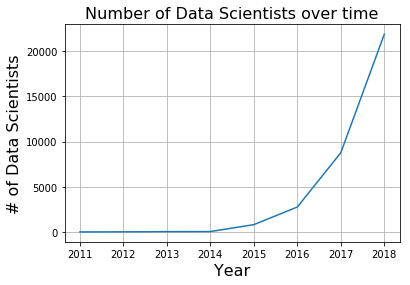

In [75]:
# plot total number of data scientists in survey
x = range(2011,2019)
y = q1_df.groupby(['year'])['data_science']

plt.plot(x,y.value_counts().loc[:,1])
plt.grid(True)
plt.xlabel('Year', fontdict=font)
plt.ylabel('# of Data Scientists', fontdict=font)
plt.title('Number of Data Scientists over time', fontdict=font)
plt.show()

The plot above shows the total number of data scientists participated in the Stack Overflow survey. Since the number of participants has increased over time in the recent years, the total number of data scientists has increased in the same way.
To observe the real development, we will have to plot the proportion of data scientists and its change in the survey.

In [76]:
# total number of entries
q1_df.groupby(['year'])['data_science'].count()

year
2011     2155
2012     4450
2013     6620
2014     7335
2015    20481
2016    46640
2017    51227
2018    92029
Name: data_science, dtype: int64

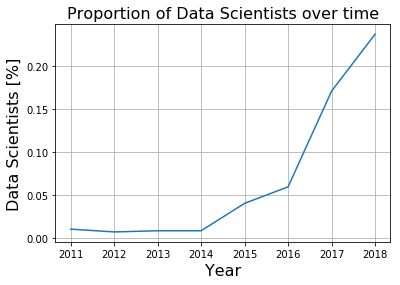

In [77]:
# plot total number of data scientists in survey
x = range(2011,2019)
y = q1_df.groupby(['year'])['data_science']

plt.plot(x,y.value_counts().loc[:,1]/y.count())
plt.grid(True)
plt.xlabel('Year', fontdict=font)
plt.ylabel('Data Scientists [%]', fontdict=font)
plt.title('Proportion of Data Scientists over time', fontdict=font)
plt.show()


As you can see, the proportion was constantly low between 2011 and 2014. After that, the proportion has increased to over 5% in 2016, following by an even larger rise to over 23% in 2018.

We will improve the plot above by using a barchart and the obtained percentages.

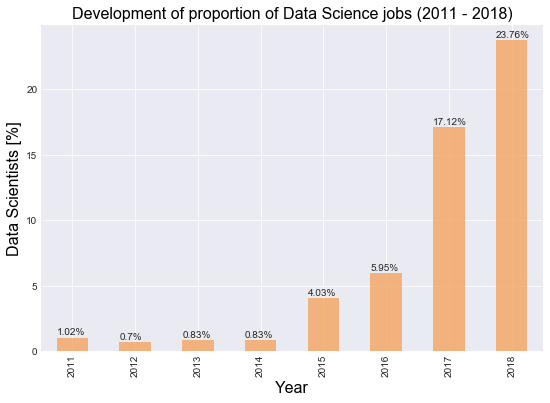

In [78]:
# plot proportion of data scientists in bar plot
sns.set_style('darkgrid')
ax =((q1_df.groupby(['year'])['data_science'].value_counts().loc[:,1]/q1_df.groupby(['year'])['data_science'].count())*100).\
        plot.bar(figsize = (9, 6), color='sandybrown', alpha=0.80)

plt.xlabel('Year', fontdict=font)
plt.ylabel('Data Scientists [%]', fontdict=font)
plt.title("Development of proportion of Data Science jobs (2011 - 2018)", fontdict=font)
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2))+ '%', (i.get_x(), i.get_height() + 0.2))

# save figure
plt.savefig('Q1.1_propDS_time.png', dpi = 400, quality = 100)

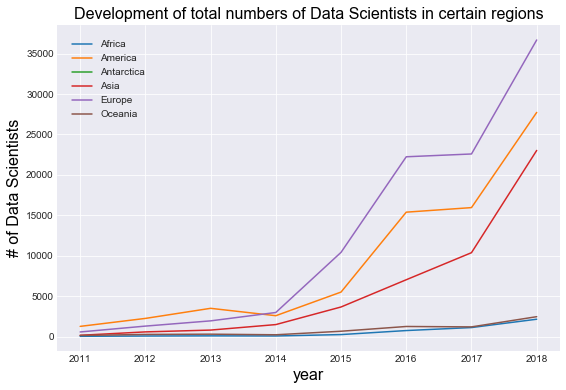

In [79]:
# plot total number of data scientists in survey grouped by superordinate region
fig, ax = plt.subplots(figsize=(9,6))
ax.set_xlabel('Year', fontdict=font)
ax.set_ylabel('# of Data Scientists', fontdict=font)
ax.set_title('Development of total numbers of Data Scientists in certain regions', fontdict=font)
q1_df.groupby(['year','superordinate_region'])['data_science'].count().unstack().plot(ax=ax)
ax.legend(fancybox=True,framealpha=1, shadow=True, borderpad=1);

# save figure
plt.savefig('Q1.1_numDS_time.png', dpi = 400, quality = 100)

As seen before, the number of data scientists has risen since 2014, when this topics  became much more important and got into the public focus. All regions had low numbers of data scientists within the years of 2011 and 2014. Here, the American countries exhibited most of the data scientists within the survey. After 2014, the number of data scientists in all regions have increased, although the growth slightly diminished in Europe and America between 2016 and 2017. However, the number of data scientist jobs has continuously boosted over the entire investigation period.

Overall, most of the data scientist jobs are located in Europe in the recent five years.

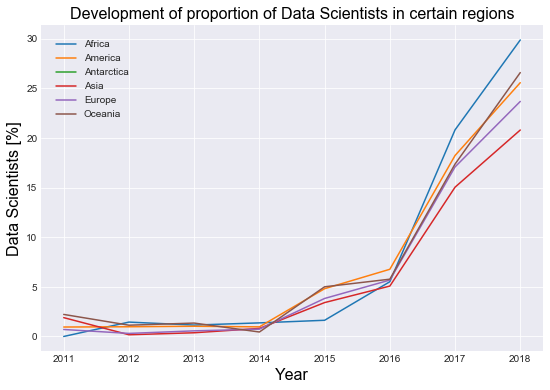

In [80]:
fig, ax = plt.subplots(figsize=(9,6))
y = q1_df.groupby(['year','superordinate_region'])['data_science'].sum()/q1_df.groupby(['year','superordinate_region'])['data_science'].count()*100
y.unstack().plot(ax=ax);
ax.set_xlabel('Year', fontdict=font)
ax.set_ylabel('Data Scientists [%]', fontdict=font)
ax.set_title('Development of proportion of Data Scientists in certain regions', fontdict=font)
ax.legend(fancybox=True,framealpha=1, shadow=True, borderpad=1);

# save figure
plt.savefig('Q1.1_propDS_regions.png', dpi = 400, quality = 100)

The growth of proportions of data scientists among the survey participants has developed quite equally in the evaluated regions. Surprisingly, the African countries showed the highest proportion of data scientist in their developer communities in 2018, although they had a rate of 0% in 2011.

#### Question 1.2: How are data scientists actually distributed over regions and countries?

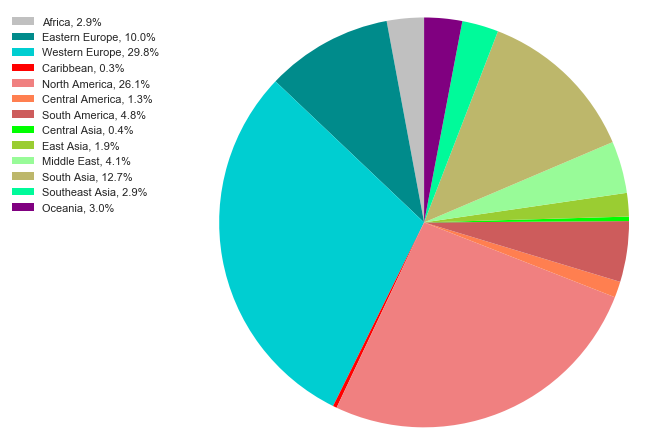

In [81]:
# create a pie chart for the local distribution of data science jobs
# influenced by: https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

y = q1_df[q1_df['year']==2018].groupby(['region'])['data_science'].sum()/q1_df[q1_df['year']==2018].groupby(['region'])['data_science'].sum().sum()*100
y1 = y[['Africa', 'Eastern Europe', 'Western Europe','Caribbean', 'North America', 'Central America', 'South America',
        'Central Asia','East Asia','Middle East', 'South Asia', 'Southeast Asia', 'Oceania']]

colors = ['silver', 'darkcyan','darkturquoise', 'red', 'lightcoral', 'coral', 'indianred', 'lime', 'yellowgreen',
          'palegreen', 'darkkhaki', 'mediumspringgreen', 'purple']
labels = list(y1.index)

fig1, ax = plt.subplots(figsize=(9, 6))
fig1.subplots_adjust(0.3,0,1,1)

_, _ = ax.pie(y1, startangle=90, colors=colors)

ax.axis('equal')

total = sum(y1)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, y1)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

# save figure
plt.savefig('Q1.2_propDS_pie.png', dpi = 400, quality = 100)

#### Question 1.3: Which countries have developed the highest growth of data scientists?

In [82]:
# show the dataset grouped by country and their proportion of the data science community within developer jobs
y = q1_df[q1_df['year']==2018].groupby(['country'])['data_science'].sum()/q1_df[q1_df['year']==2018].groupby(['country'])['data_science'].sum().sum()*100
y.sort_values(ascending=False)

country
United States               22.464100
India                       10.212202
Germany                      7.097777
United Kingdom               6.795939
Canada                       3.608342
Brazil                       2.739413
Russian Federation           2.638800
France                       2.309522
Australia                    2.300375
Netherlands                  1.888777
Spain                        1.884204
Italy                        1.811031
Poland                       1.673832
Sweden                       1.234794
Iran                         1.189061
Switzerland                  1.161621
Pakistan                     1.134181
Turkey                       1.006128
China                        1.001555
Austria                      0.978688
Mexico                       0.923809
Ukraine                      0.910089
Czech Republic               0.896369
Denmark                      0.855209
Belgium                      0.855209
Indonesia                    0.841489
Isra

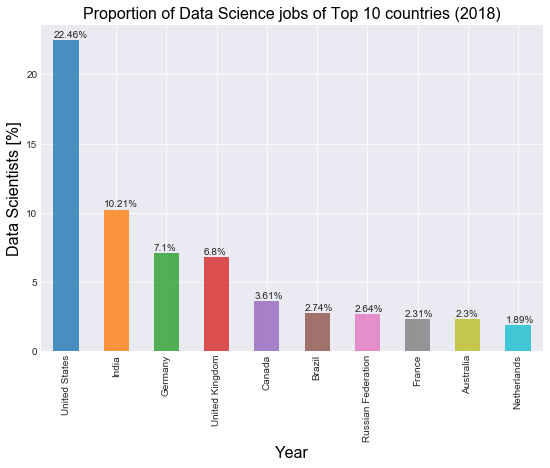

In [83]:
# create a top10 of these countries and plot a bar chart
top10_countries = y.sort_values(ascending=False)[0:10]
ax =(top10_countries.plot.bar(figsize = (9, 6), alpha=0.80))

plt.xlabel('Year', fontdict=font)
plt.ylabel('Data Scientists [%]', fontdict=font)
plt.title("Proportion of Data Science jobs of Top 10 countries (2018)", fontdict=font)
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2))+ '%', (i.get_x(), i.get_height() + 0.2))

# save figure
plt.savefig('Q1.3_propDS_top10.png', dpi = 400, quality = 100)

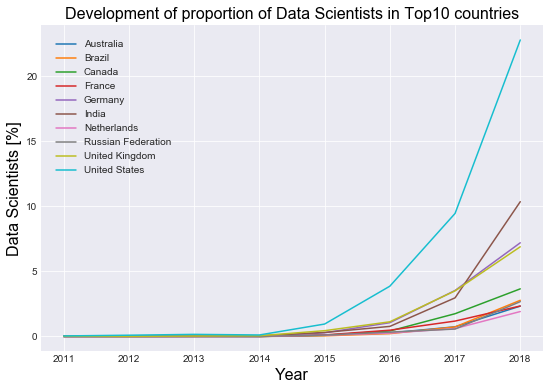

In [84]:
# plot development of the top10 countries
fig, ax = plt.subplots(figsize=(9,6))
#y = q1_df.groupby(['year','superordinate_region'])['data_science'].sum()/q1_df.groupby(['year','superordinate_region'])['data_science'].count()*100
top10_df = q1_df[q1_df['country'].isin(list(top10_countries.index))]
y = top10_df.groupby(['year','country'])['data_science'].sum()/top10_df.groupby(['year','country'])['data_science'].sum().sum()*100
y.unstack().plot(ax=ax);
ax.set_xlabel('Year', fontdict=font)
ax.set_ylabel('Data Scientists [%]', fontdict=font)
ax.set_title('Development of proportion of Data Scientists in Top10 countries', fontdict=font)
ax.legend(fancybox=True,framealpha=1, shadow=True, borderpad=1);

# save figure
plt.savefig('Q1.3_numDS_time_top10.png', dpi = 400, quality = 100)


#### Question 2.1: What is the common level of education of employees in the field of Data Science? Are there regional differences?

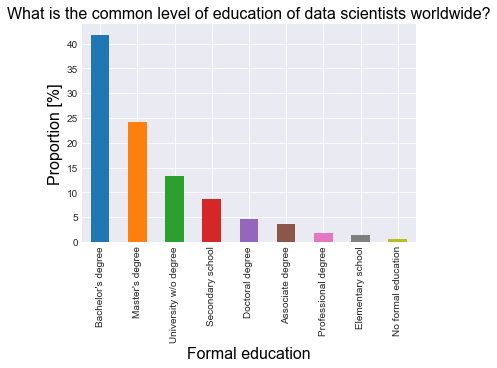

In [113]:
# plot bar chart of level of formal education
formaledu_vals = ds_q2_df.formal_education.value_counts()
formaledu_vals*=100
(formaledu_vals/ds_q2_df.shape[0]).plot(kind="bar");
plt.title("What is the common level of education of data scientists worldwide?", fontdict=font);
plt.xlabel('Formal education', fontdict=font)
locs, labels = plt.xticks()
plt.ylabel('Proportion [%]', fontdict=font);

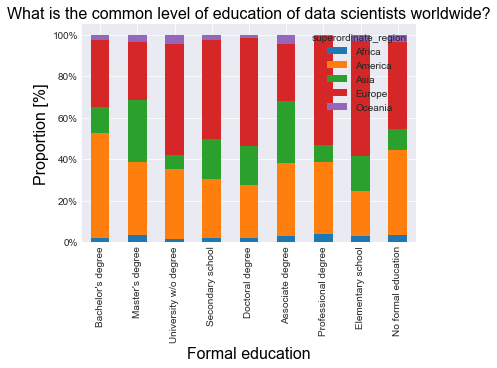

In [119]:
# plot bar chart of level of formal education

ds_q2_df.groupby(['formal_education'])['superordinate_region'].value_counts().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("What is the common level of education of data scientists worldwide?", fontdict=font);
plt.xlabel('Formal education', fontdict=font)
plt.ylabel('Proportion [%]', fontdict=font);
plt.xticks(locs,labels)
plt.show()
